# **Results**

### Basic setup:

In [13]:
# magics
%load_ext autoreload
%autoreload 2

# load general packages
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

# load modules
from model_new import model_bufferstock
import tools

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 1. Run model for different values of $\lambda$:

In [16]:
model = model_bufferstock()

c:\Users\peter\OneDrive\Documents\GitHub\BufferStock\model_new.py:166: RuntimeWarning: divide by zero encountered in power
  w_d_c = w_d - c


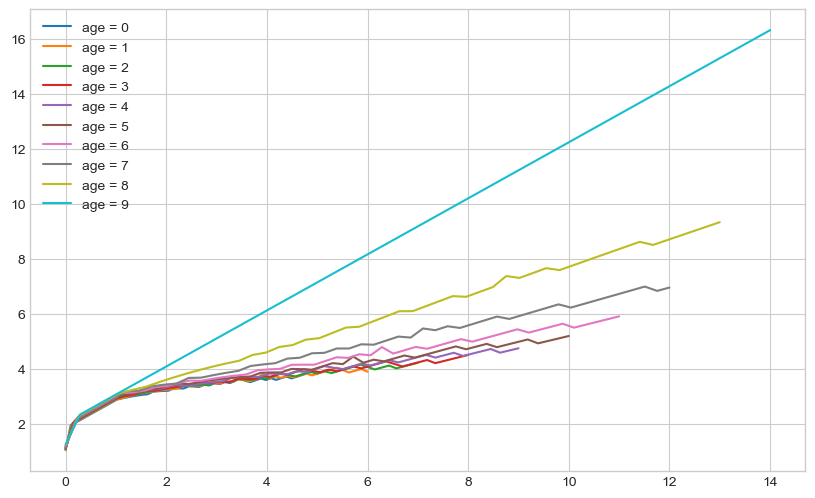

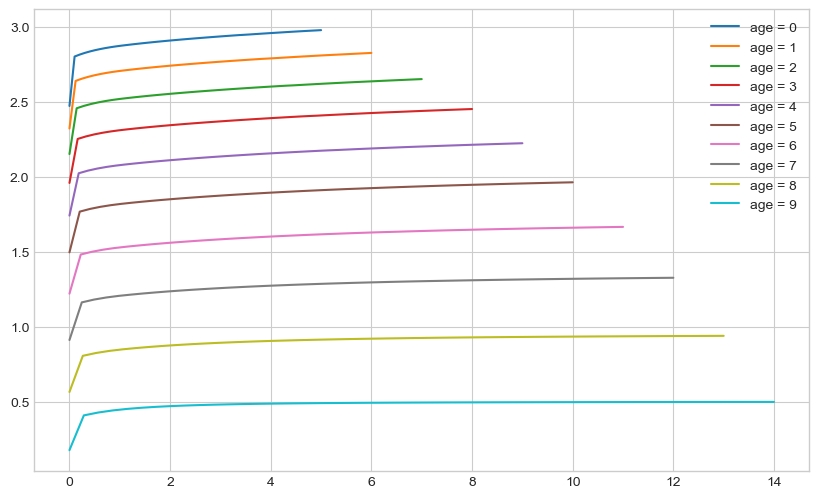

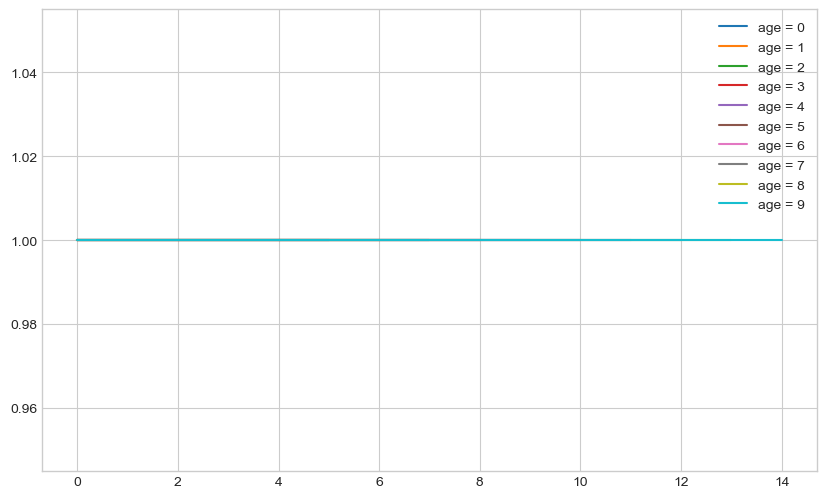

In [28]:
model.setup()

model.create_grids()

sol = model.solve()

fig = plt.figure(figsize=(10,6))

ax = fig.add_subplot(1,1,1)

for i in range(0,model.par.T,1):
    ax.plot(sol.grid_w[i,:],sol.c[i,:], label=f'age = {i}')

plt.legend()
plt.show()


fig = plt.figure(figsize=(10,6))

ax = fig.add_subplot(1,1,1)

for i in range(0,model.par.T,1):
    plt.plot(sol.grid_w[i,:],sol.v[i,:], label=f'age = {i}')

plt.legend()
plt.show()

fig = plt.figure(figsize=(10,6))

ax = fig.add_subplot(1,1,1)


for i in range(0,model.par.T,1):
    plt.plot(sol.grid_w[i,:],sol.d[i,:], label=f'age = {i}')

plt.legend()
plt.show()